# HW03: Melbourne Housing
## Structured and time series data
Link: https://www.kaggle.com/anthonypino/melbourne-housing-market/data

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
import pandas as pd
import numpy as np
from  sklearn.model_selection import *

np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/melbourne-housing/'

## Data Cleaning / Feature Engineering

As a structured data problem, we necessarily have to go through all the cleaning and feature engineering, even though we're using a neural network.

In [3]:
tables = pd.read_csv('{0}/Melbourne_housing_FULL.csv'.format(PATH))
print(tables.shape)
tables.head()

(31420, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df = tables.loc[tables['Price'].notna(), :].reset_index()

In [5]:
df = df.fillna(value={'Car': 0})

In [6]:
df["Date"] = pd.to_datetime(df.Date)

In [7]:
idx = df["YearBuilt"].notna()
df.loc[idx,"YearBuilt"] = 2018 - df.loc[idx,"YearBuilt"]

In [8]:
df.to_feather(f'{PATH}df')
df.columns

Index(['index', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [9]:
print(df.shape)
df.head()

(24589, 22)


,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,...,1.0,0.0,156.0,79.0,118.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,...,2.0,0.0,134.0,150.0,118.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,...,1.0,2.0,120.0,142.0,4.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


## Create features

In [10]:
df = pd.read_feather(f'{PATH}df')
df.head().T.head(40)

,0,1,2,3,4
index,1,2,4,5,6
Suburb,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford
Address,85 Turner St,25 Bloomburg St,5 Charles St,40 Federation La,55a Park St
Rooms,2,2,3,3,4
Type,h,h,h,h,h
Price,1.48e+06,1.035e+06,1.465e+06,850000,1.6e+06
Method,S,S,SP,PI,VB
SellerG,Biggin,Biggin,Biggin,Biggin,Nelson
Date,2016-03-12 00:00:00,2016-04-02 00:00:00,2017-04-03 00:00:00,2017-04-03 00:00:00,2016-04-06 00:00:00
Distance,2.5,2.5,2.5,2.5,2.5


In [11]:
cat_vars = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Postcode',
    'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname']
contin_vars = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
for v in cat_vars: df[v] = df[v].astype('category').cat.as_ordered()
for v in contin_vars: df[v] = df[v].astype('float32')
    
DataFrameSummary(df).summary()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,24589,NaN,NaN,24589,NaN,24589,NaN,NaN,NaN,24588,...,18935,24589,16116,9742,11103,NaN,NaN,NaN,NaN,24586
mean,15765.5,NaN,NaN,2.98036,NaN,1.04834e+06,NaN,NaN,NaN,11.1414,...,1.57798,1.28212,591.617,154.989,51.4178,NaN,NaN,NaN,NaN,7559.5
std,9055.57,NaN,NaN,0.959771,NaN,641516,NaN,NaN,NaN,6.70496,...,0.699885,1.12407,3940.9,465.186,36.7451,NaN,NaN,NaN,NaN,4498.69
min,1,NaN,NaN,1,NaN,85000,NaN,NaN,NaN,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,83
25%,7976,NaN,NaN,2,NaN,635000,NaN,NaN,NaN,6.4,...,1,0,203,98,18,NaN,NaN,NaN,NaN,4294
50%,15797,NaN,NaN,3,NaN,870000,NaN,NaN,NaN,10.4,...,1,1,492,131,48,NaN,NaN,NaN,NaN,6567
75%,23606,NaN,NaN,4,NaN,1.292e+06,NaN,NaN,NaN,13.9,...,2,2,661,180,68,NaN,NaN,NaN,NaN,10412
max,31419,NaN,NaN,16,NaN,1.12e+07,NaN,NaN,NaN,48.1,...,9,18,433014,44515,822,NaN,NaN,NaN,NaN,21650
counts,24589,24589,24589,24589,24589,24589,24589,24589,24589,24588,...,18935,24589,16116,9742,11103,24586,19111,19111,24586,24586
uniques,24589,342,24172,12,3,2760,5,340,73,213,...,10,12,1515,650,147,33,10020,10880,8,334


Since Bedroom2, Bathrrom, Car, Landsize, BuildingArea and YearBuilt has ton of data missing. I am not using these categories for now

In [12]:
idx = ['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 
       'Distance', 'Postcode', 'CouncilArea', 'Regionname', 'Car',
       'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']
df = df.loc[:,idx]
# df = df.loc[:,idx].dropna(how='any')
DataFrameSummary(df).summary()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,CouncilArea,Regionname,Car,Bathroom,Landsize,BuildingArea,YearBuilt
count,NaN,24589,NaN,24589,NaN,NaN,24588,NaN,NaN,NaN,24589,18935,16116,9742,11103
mean,NaN,2.98036,NaN,1.04834e+06,NaN,NaN,11.1414,NaN,NaN,NaN,1.28212,1.57798,591.617,154.989,51.4178
std,NaN,0.959771,NaN,641516,NaN,NaN,6.70496,NaN,NaN,NaN,1.12407,0.699885,3940.9,465.186,36.7451
min,NaN,1,NaN,85000,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,0
25%,NaN,2,NaN,635000,NaN,NaN,6.4,NaN,NaN,NaN,0,1,203,98,18
50%,NaN,3,NaN,870000,NaN,NaN,10.4,NaN,NaN,NaN,1,1,492,131,48
75%,NaN,4,NaN,1.292e+06,NaN,NaN,13.9,NaN,NaN,NaN,2,2,661,180,68
max,NaN,16,NaN,1.12e+07,NaN,NaN,48.1,NaN,NaN,NaN,18,9,433014,44515,822
counts,24589,24589,24589,24589,24589,24589,24588,24588,24586,24586,24589,18935,16116,9742,11103
uniques,342,12,3,2760,5,340,213,208,33,8,12,10,1515,650,147


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df, df['Price'], test_size=0.2, random_state=1)
print(str(X_train.shape)+" "+str(X_test.shape))

df_train, y_train, nas, mapper = proc_df(X_train, 'Price', do_scale=True, )
df_test, _, nas, mapper = proc_df(X_test, 'Price', do_scale=True, mapper=mapper, na_dict=nas)

(19671, 15) (4918, 15)


In [14]:
yl_train = np.log(y_train)
df_test.head()

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,CouncilArea,Regionname,Car,Bathroom,Landsize,BuildingArea,YearBuilt,Distance_na,Bathroom_na,Landsize_na,BuildingArea_na,YearBuilt_na
7285,281,-2.064097,3,1,155,-1.169878,110,19,6,-1.147581,-0.673207,-0.019961,-0.098925,-0.059849,-0.00713,1.841692,1.383086,0.810594,0.906677
23502,15,0.018848,1,2,49,-0.148403,116,22,6,0.638059,-0.673207,0.058220,-0.098925,-0.059849,-0.00713,-0.542979,-0.723021,0.810594,0.906677
300,10,1.060321,1,2,327,-0.015167,18,11,7,-1.147581,-0.673207,-0.019961,-0.098925,-0.059849,-0.00713,1.841692,1.383086,0.810594,0.906677
1569,44,1.060321,1,1,49,-0.074383,152,2,6,2.423699,2.353341,0.040594,1.732429,0.746372,-0.00713,-0.542979,-0.723021,-1.233662,-1.102928
21143,136,0.018848,1,1,203,-1.347525,52,32,3,-1.147581,-0.673207,-0.019961,-0.098925,-0.059849,-0.00713,1.841692,1.383086,0.810594,0.906677


In [15]:
val_ratio = 0.1
val_idx = np.random.choice(range(len(df_train)), size=(int(df_train.shape[0]*val_ratio)), replace=False)
print(len(val_idx))

1967


## DL

We're ready to put together our models.

In [16]:
max_log_y = np.max(yl_train)
y_range = (0, max_log_y*1.2)
cat_vars2 = list(set(cat_vars)&set(idx))
md = ColumnarModelData.from_data_frame(PATH, val_idx, df_train, yl_train.astype(np.float32), 
                                       cat_flds=cat_vars2, 
                                       bs=128,
                                       test_df=df_test)

Some categorical variables have a lot more levels than others. Store, in particular, has over a thousand!

In [17]:
cat_sz = [(c, len(df[c].cat.categories)+1) for c in cat_vars2]

In [18]:
cat_sz

[('Regionname', 9),
 ('SellerG', 341),
 ('Suburb', 343),
 ('Type', 4),
 ('Postcode', 209),
 ('Method', 6),
 ('CouncilArea', 34)]

We use the *cardinality* of each variable (that is, its number of unique values) to decide how large to make its *embeddings*. Each level will be associated with a vector with length defined as below.

In [19]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [20]:
emb_szs

[(9, 5), (341, 50), (343, 50), (4, 2), (209, 50), (6, 3), (34, 17)]

In [21]:
m = md.get_learner(emb_szs, len(df_train.columns)-len(cat_vars2),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-4

In [22]:
m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 72%|███████▏  | 100/139 [00:10<00:04,  9.50it/s, loss=7.86]

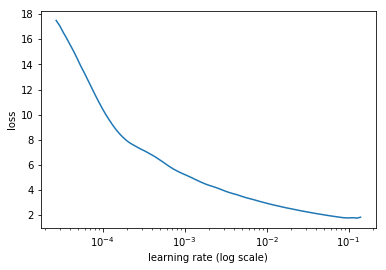

In [23]:
m.sched.plot()

### Sample

In [24]:
m = md.get_learner(emb_szs, len(df_train.columns)-len(cat_vars2),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-4

In [25]:
m.fit(lr, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

epoch      trn_loss   val_loss   
    0      0.70935    0.267237  
    1      0.195676   0.123678  
    2      0.131491   0.113806  
    3      0.10555    0.086708  
    4      0.090942   0.075323  
    5      0.083203   0.070225  
 58%|█████▊    | 81/139 [00:00<00:00, 105.79it/s, loss=0.0811]

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/luke/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/luke/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/luke/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



    6      0.083157   0.069878  
    7      0.095495   0.064057  
    8      0.076842   0.058464  
    9      0.067961   0.054859  
    10     0.065805   0.053413  
    11     0.064982   0.057491  
    12     0.056499   0.051305  
    13     0.05941    0.051049  
    14     0.056572   0.050783  
    15     0.068321   0.055234  
    16     0.069914   0.073688  
    17     0.069531   0.062517  
    18     0.062092   0.052176  
    19     0.059911   0.053097  
    20     0.052524   0.047211  
    21     0.057323   0.053702  
    22     0.05059    0.045608  
    23     0.05256    0.045285  
    24     0.047188   0.05536   
    25     0.04596    0.046809  
    26     0.046027   0.045203  
    27     0.043358   0.044505  
    28     0.041349   0.044096  
    29     0.041736   0.044159  
    30     0.045315   0.044155  



[0.04415544]

In [26]:
m.save('val0')

### Test

In [27]:
m.load('val0')

In [28]:
x,y = m.predict_with_targs()
sklearn.metrics.r2_score(y, x)

0.8360210675639805

In [29]:
pred_test = m.predict(True)
sklearn.metrics.r2_score(np.log(y_test), pred_test)

0.8073280614488726

## RF

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df_train.values, yl_train)

In [32]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

In [33]:
preds = m.predict(val)
m.score(trn, y_trn), m.score(val, y_val), m.score(df_test, np.log(y_test)), m.oob_score_

(0.950015608676095, 0.8420504147668317, 0.8357496611093398, 0.8269043711901687)

In [34]:
sklearn.metrics.r2_score(preds, y_val)

0.8159565088034966

In [35]:
sklearn.metrics.r2_score(m.predict(df_test), np.log(y_test))

0.8030596286175968